In [ ]:
!rm trigo.csv
!wget https://raw.githubusercontent.com/bdm-unlu/2021/main/TPs/TP05/TP0502/trigo.csv

--2021-11-05 20:21:51--  https://raw.githubusercontent.com/bdm-unlu/2021/main/TPs/TP05/TP0502/trigo.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 9369 (9.1K) [text/plain]
Saving to: ‘trigo.csv’

trigo.csv           100%[===================>]   9.15K  --.-KB/s    in 0s      

2021-11-05 20:21:51 (80.0 MB/s) - ‘trigo.csv’ saved [9369/9369]



In [ ]:
import pandas as pd 

seeds = pd.read_csv("trigo.csv", delimiter=";") 

feature_names = list(seeds.columns)
feature_names.remove("tipo")
seeds = seeds[feature_names]

seeds.head()

,area,perimetro,compact,long_kernel,ancho_kernel,coef_asimetrima,long_ranura
0,"15,26","14,84","0,871","5,763","3,312","2,221","5,22"
1,"14,88","14,57","0,8811","5,554","3,333","1,018","4,956"
2,"14,29","14,09","0,905","5,291","3,337","2,699","4,825"
3,"13,84","13,94","0,8955","5,324","3,379","2,259","4,805"
4,"16,14","14,99","0,9034","5,658","3,562","1,355","5,175"


In [ ]:
for i in range(7):
  seeds[seeds.columns[i]] = seeds.get(seeds.columns[i]).str.replace(',','.')
seeds

,area,perimetro,compact,long_kernel,ancho_kernel,coef_asimetrima,long_ranura
0,15.26,14.84,0.871,5.763,3.312,2.221,5.22
1,14.88,14.57,0.8811,5.554,3.333,1.018,4.956
2,14.29,14.09,0.905,5.291,3.337,2.699,4.825
3,13.84,13.94,0.8955,5.324,3.379,2.259,4.805
4,16.14,14.99,0.9034,5.658,3.562,1.355,5.175
...,...,...,...,...,...,...,...
205,12.19,13.2,0.8783,5.137,2.981,3.631,4.87
206,11.23,12.88,0.8511,5.14,2.795,4.325,5.003
207,13.2,13.66,0.8883,5.236,3.232,8.315,5.056
208,11.84,13.21,0.8521,5.175,2.836,3.598,5.044


In [ ]:
from sklearn.preprocessing import scale, MinMaxScaler

scaled_1 = scale(seeds)

print(scaled_1[1:6,])


[[ 0.01118803  0.00822376  0.42851527 -0.16862466  0.19743223 -1.7881662
  -0.92201349]
 [-0.19206658 -0.36020056  1.44238325 -0.76363745  0.20804754 -0.66747933
  -1.18919199]
 [-0.34709127 -0.47533316  1.03938133 -0.68897805  0.31950836 -0.96081795
  -1.2299826 ]
 [ 0.44525718  0.33059504  1.37450924  0.06666556  0.80515903 -1.56349549
  -0.4753563 ]
 [-0.16106164 -0.26809448  1.02241283 -0.54870888  0.14170182 -0.82548218
  -0.92201349]]


In [ ]:
k = 3

from sklearn.cluster import KMeans
# Por defecto usa la distancia euclidea
km = KMeans(
    n_clusters=k, init='random',
    n_init=10, random_state=0
)

# Para definir una métrica de distancia diferente usar el módulo KMeansClusterer
# kclusterer = KMeansClusterer(NUM_CLUSTERS, distance=nltk.cluster.util.cosine_distance, repeats=25)
y_km = km.fit_predict(scaled_1)

In [ ]:
print(y_km)

[2 2 2 2 2 2 2 2 0 2 2 2 2 2 2 2 2 2 2 1 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 0 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 1 1 1 2 1 2 2 2 2 2 1 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 2 0 0 0 0 0 0 0 2 0 0 2 0 2 2 0 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 2 1 2 1 2 1 1 1 1 1 1 1 1]


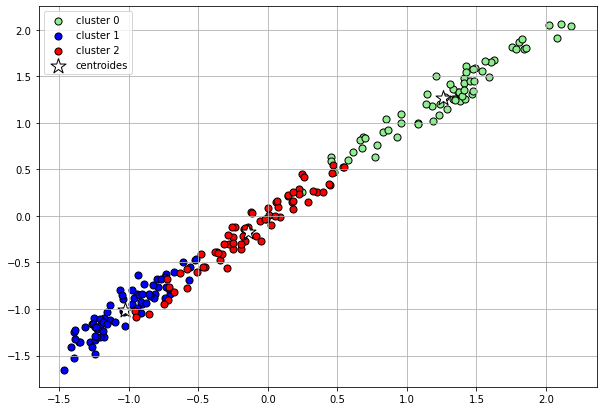

In [ ]:
import matplotlib.pyplot as plt
import matplotlib.colors as colors
import seaborn as sns
import numpy as np

#configuro el tamaño del grafico final
plt.figure(figsize=(10,7))

#colors = colors_list = list(colors._colors_full_map.values())
#colors = [(0.20973515, 0.09747934, 0.24238489), (0.43860848, 0.12177004, 0.34119475), (0.67824099, 0.09192342, 0.3504148), (0.8833417, 0.19830556, 0.26014181), (0.95381595, 0.46373781, 0.31769923), (0.96516917, 0.70776351, 0.5606593)]
#colors = sns.color_palette("Pastel1")
colors = ["lightgreen", "blue", "red", "yellow", "orange"]


for i in range(k):
  plt.scatter(scaled_1[y_km == i, 0], scaled_1[y_km == i, 1],s=50, c=colors[i],marker='o', edgecolor='black',label='cluster '+str(i))

#scatter del los centroides
plt.scatter(
    km.cluster_centers_[:, 0], km.cluster_centers_[:, 1],
    s=250, marker='*',
    c='white', edgecolor='black',
    label='centroides'
)
#le pongo la leyenda
plt.legend(scatterpoints=1)
#hace una grilla en el grafico
plt.grid()
#lo imprime en pantalla
plt.show()

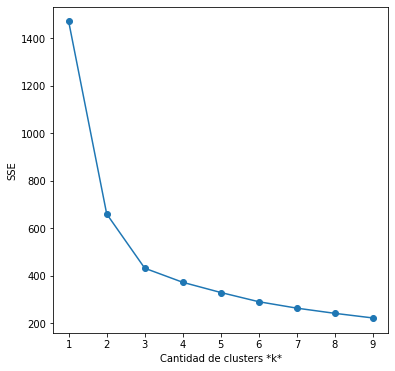

In [ ]:
# Corro el algoritmo con K entre 2 y 10 y voy guardando el error para luego graficarlo.
sse = []
list_k = list(range(1, 10))

for k in list_k:
    km = KMeans(n_clusters=k)
    km.fit(scaled_1)
    sse.append(km.inertia_)

# Grafico el SSE por K
plt.figure(figsize=(6, 6))
plt.plot(list_k, sse, '-o')
plt.xlabel(r'Cantidad de clusters *k*')
plt.ylabel('SSE');

In [ ]:
seeds["cluster"] =  y_km
seeds.to_csv()

',area,perimetro,compact,long_kernel,ancho_kernel,coef_asimetrima,long_ranura,cluster\n0,15.26,14.84,0.871,5.763,3.312,2.221,5.22,2\n1,14.88,14.57,0.8811,5.554,3.333,1.018,4.956,2\n2,14.29,14.09,0.905,5.291,3.337,2.699,4.825,2\n3,13.84,13.94,0.8955,5.324,3.379,2.259,4.805,2\n4,16.14,14.99,0.9034,5.658,3.562,1.355,5.175,2\n5,14.38,14.21,0.8951,5.386,3.312,2.462,4.956,2\n6,14.69,14.49,0.8799,5.563,3.259,3.586,5.219,2\n7,14.11,14.1,0.8911,5.42,3.302,2.7,5,2\n8,16.63,15.46,0.8747,6.053,3.465,2.04,5.877,0\n9,16.44,15.25,0.888,5.884,3.505,1.969,5.533,2\n10,15.26,14.85,0.8696,5.714,3.242,4.543,5.314,2\n11,14.03,14.16,0.8796,5.438,3.201,1.717,5.001,2\n12,13.89,14.02,0.888,5.439,3.199,3.986,4.738,2\n13,13.78,14.06,0.8759,5.479,3.156,3.136,4.872,2\n14,13.74,14.05,0.8744,5.482,3.114,2.932,4.825,2\n15,14.59,14.28,0.8993,5.351,3.333,4.185,4.781,2\n16,13.99,13.83,0.9183,5.119,3.383,5.234,4.781,2\n17,15.69,14.75,0.9058,5.527,3.514,1.599,5.046,2\n18,14.7,14.21,0.9153,5.205,3.466,1.767,4.649,2\n19,12.7

In [ ]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)

pca_data = pca.fit_transform(scaled_1)

print(pca.components_)

import pandas as pd

df = pd.DataFrame(pca_data, columns=['Comp 1', 'Comp 2'])

df.loc[:,'cluster'] = y_km.copy()

[[ 0.44447352  0.44157147  0.27701737  0.42356333  0.43281866 -0.11869248
   0.38716084]
 [-0.02656355 -0.08400282  0.52915125 -0.20597518  0.11668963 -0.71688203
  -0.37719327]]


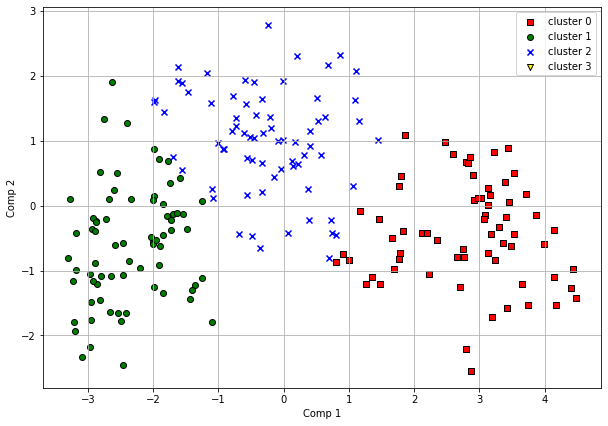

In [ ]:
cluster0 = df[df['cluster'] == 0]
cluster1 = df[df['cluster'] == 1]
cluster2 = df[df['cluster'] == 2]
cluster3 = df[df['cluster'] == 3]

plt.figure(figsize=(10,7))

x = 'Comp 1'
y = 'Comp 2'

#scatter del primer cluster
plt.scatter(
    cluster0[x], cluster0[y],
    c='red',
    marker='s', edgecolor='black',
    label='cluster 0'
)

plt.scatter(
    cluster1[x], cluster1[y],
    c='green',
    marker='o', edgecolor='black',
    label='cluster 1'
)

plt.scatter(
    cluster2[x], cluster2[y],
    c='blue',
    marker='x', edgecolor='black',
    label='cluster 2'
)

plt.scatter(
    cluster3[x], cluster3[y],
    c='yellow',
    marker='v', edgecolor='black',
    label='cluster 3'
)

plt.legend(scatterpoints=1)

plt.xlabel(x)
plt.ylabel(y)

plt.grid()
#lo imprime en pantalla
plt.show()